In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [16]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Cleaning and Simplifying data - >(Rate Column)

In [17]:
def handlerate(values):
 values= str(values).split('/')
 values=values[0]
 return float(values)

df['rate']=df['rate'].apply(handlerate)
print(df.head())
            

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of Restraunts -> Will do Dire Visual Representation

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restraunts')

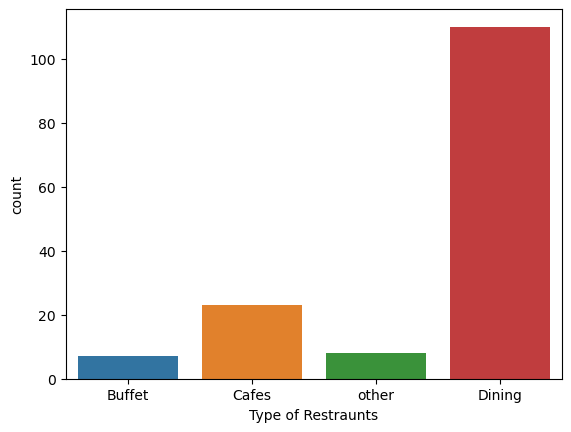

In [20]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restraunts")

# 1. Majority of restraunts falls under dining type.

Text(0, 0.5, 'Votes')

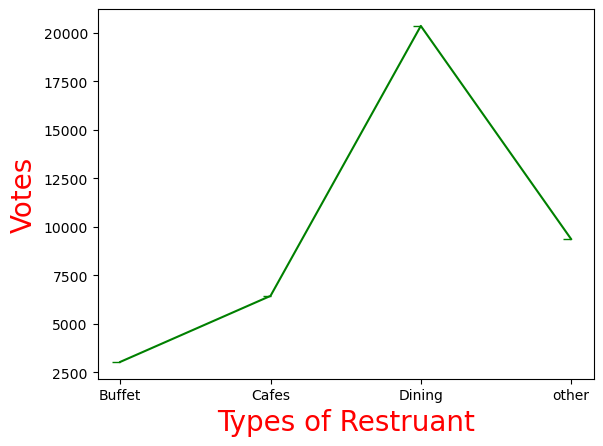

In [21]:
grouped_data= df.groupby('listed_in(type)')['votes'].sum()
results=pd.DataFrame(grouped_data)
plt.plot(results,c='green',marker=0)
plt.xlabel('Types of Restruant', c='red',size = 20 )
plt.ylabel('Votes',c='red', size =20)



# 2. Dining Restraunts have the maximum votes.

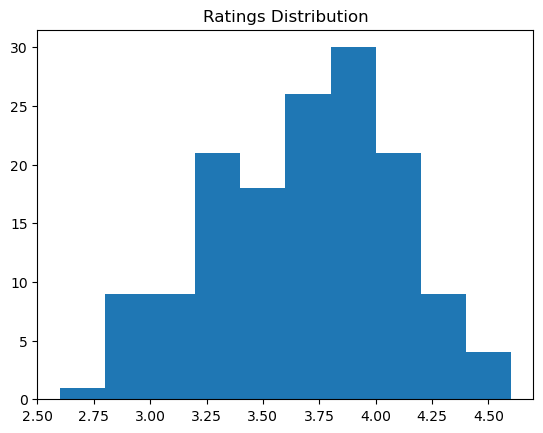

In [27]:
plt.hist(df["rate"])
plt.title("Ratings Distribution")
plt.show()


# Majority restraunts received ratings from 3.75 to 4.00

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

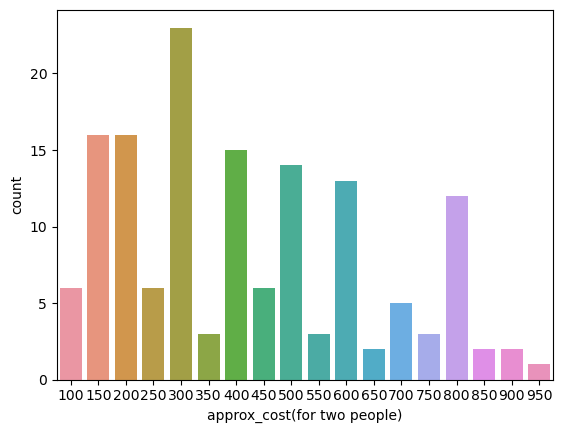

In [32]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Order that costs of Rs. 300 has been for the maximum times.

<Axes: xlabel='online_order', ylabel='rate'>

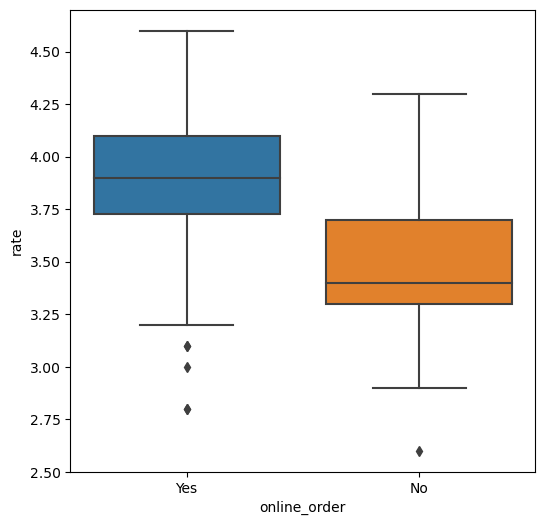

In [37]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y = "rate" ,  data= df)

# The ratings of Online order is better ads compared with the offlines one(Needs improvement)

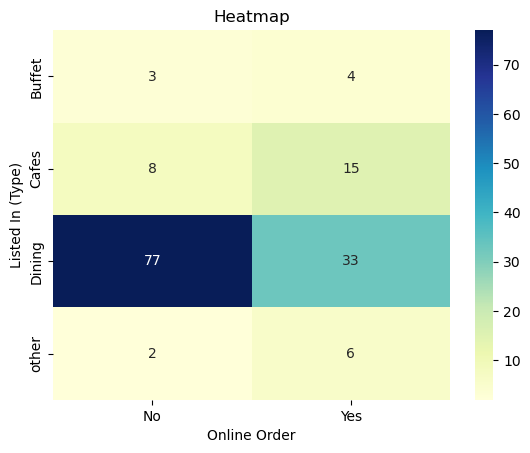

In [43]:
pivot_table= df.pivot_table(index="listed_in(type)",columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Dining restraunts have maximum offline preferences where as fot the online cafes are prefered.